In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pickle

In [2]:
# Image to numpy array logic
def get_image(fulldir):
    image = cv2.imread(fulldir, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    else:
        resized = cv2.resize(image, (50, 40), interpolation=cv2.INTER_AREA)
        return np.expand_dims(resized, axis=2)

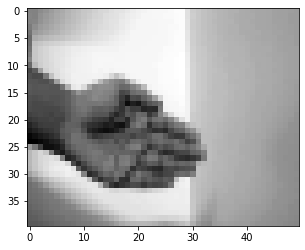

In [3]:
# Looking at a sample pic to check working of previous function
imshow(np.squeeze(get_image(os.path.join(os.getcwd(), 'dataset', 'paper', 'img0534.png'))), cmap='gray')

In [4]:
dataset_path = os.path.join(os.getcwd(), "dataset")
dataset_path

'D:\\Machine Learning\\rockpaperscissors\\dataset'

In [5]:
classes = []
data = []

for index, folder in enumerate(os.listdir(dataset_path)):
    classes.append(folder)
    for file in os.listdir(os.path.join(dataset_path, folder)):
        img = get_image(os.path.join(dataset_path, folder, file))
        if img is None:
            continue
        else:
            data.append((img, index))

In [6]:
random.shuffle(data)

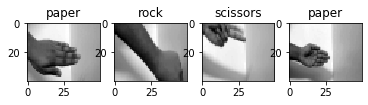

In [7]:
# Plotting a little part of the dataset
fig, ax = plt.subplots(1, 4)
for index, d in enumerate(data[:4]):
    ax[index].imshow(np.squeeze(d[0]), cmap='gray')
    ax[index].set_title(classes[d[1]])

In [8]:
X = []
Y = []

for x, y in data:
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [9]:
with open("X.pkl", "wb") as handle:
    pickle.dump(X, handle)
    
with open("Y.pkl", "wb") as handle:
    pickle.dump(Y, handle)
    
with open("classes.pkl", "wb") as handle:
    pickle.dump(classes, handle)